In [2]:
import shap
import matplotlib.pyplot as plt

In [3]:
# Load the model
import pickle
model = pickle.load(open("../models/xgb_model.pkl", "rb"))

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle

# Load cleaned dataset
data = pd.read_csv("../data/cleaned_loan_data.csv")

# Target variable: "loan_status_Fully Paid"
y = data['loan_status_Fully Paid']

# Drop target and unnecessary columns
X = data.drop(columns=['loan_status_Fully Paid', 'id', 'member_id'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Load trained model
model = pickle.load(open("../models/xgb_model.pkl", "rb"))


In [7]:
# Create explainer
explainer = shap.Explainer(model)

In [8]:
# Calculate SHAP values
shap_values = explainer(X_test)

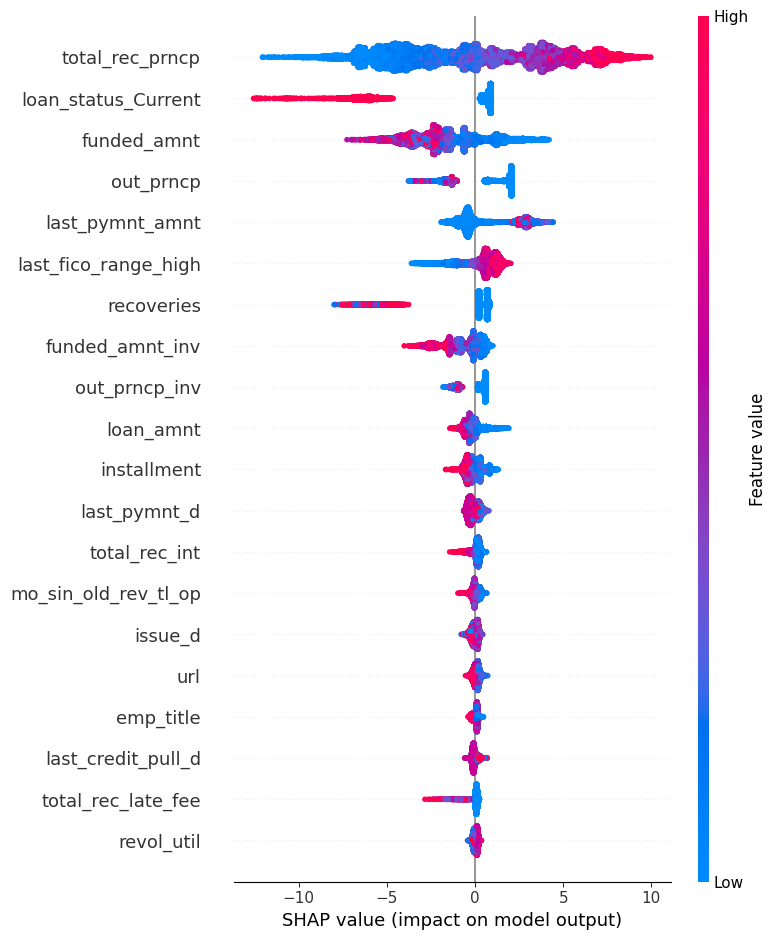

In [9]:
# Summary plot
shap.summary_plot(shap_values, X_test)

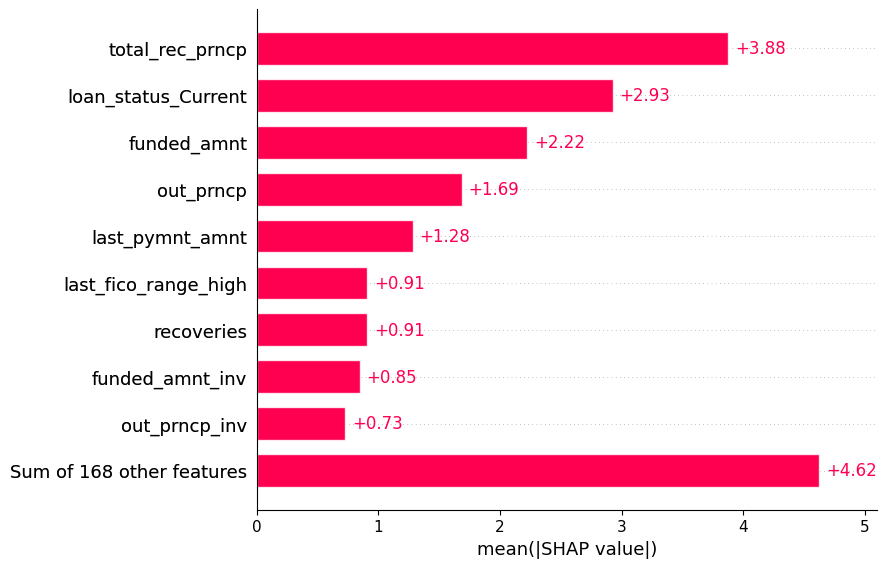

In [10]:
# Bar plot of feature importance
shap.plots.bar(shap_values)

In [12]:
plt.savefig("../models/shap_summary_plot.png")


<Figure size 640x480 with 0 Axes>

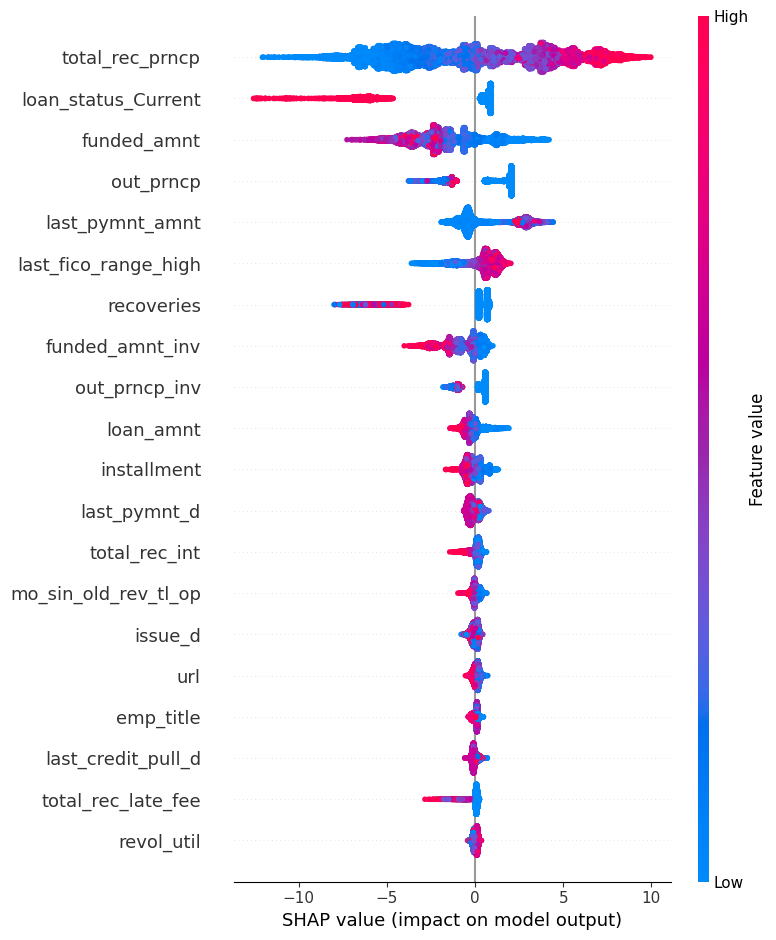

In [13]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Save summary plot
shap.summary_plot(shap_values, X_test, show=False)  # Disable interactive display
plt.savefig("../models/shap_summary_plot.png", bbox_inches="tight")
